<a href="https://colab.research.google.com/github/fhashmi1982/PGD-Deep-Learning-2024/blob/main/Assignment3_Graduate_Admission.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving Admission_Predict_Ver1.1.csv to Admission_Predict_Ver1.1.csv


In [ ]:
import pandas as pd

# Load the uploaded file into a DataFrame
df = pd.read_csv("Admission_Predict_Ver1.1.csv")

# Display the first few rows of the DataFrame to verify the data
print(df.head())


   Serial No.  GRE Score  TOEFL Score  University Rating  SOP  LOR   CGPA  \
0           1        337          118                  4  4.5   4.5  9.65   
1           2        324          107                  4  4.0   4.5  8.87   
2           3        316          104                  3  3.0   3.5  8.00   
3           4        322          110                  3  3.5   2.5  8.67   
4           5        314          103                  2  2.0   3.0  8.21   

   Research  Chance of Admit   
0         1              0.92  
1         1              0.76  
2         1              0.72  
3         1              0.80  
4         0              0.65  


In [ ]:
df

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65
...,...,...,...,...,...,...,...,...,...
495,496,332,108,5,4.5,4.0,9.02,1,0.87
496,497,337,117,5,5.0,5.0,9.87,1,0.96
497,498,330,120,5,4.5,5.0,9.56,1,0.93
498,499,312,103,4,4.0,5.0,8.43,0,0.73


In [ ]:
df = df.drop(columns=['Serial No.'], errors='ignore')

In [ ]:
import pandas as pd

# Load the dataset
df = pd.read_csv("Admission_Predict_Ver1.1.csv")

# Drop the column 'Serial No.' if it exists
df = df.drop(columns=['Serial No.'], errors='ignore')

# Check for missing values
print("Missing values in each column:")
print(df.isnull().sum())

Missing values in each column:
GRE Score            0
TOEFL Score          0
University Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
Chance of Admit      0
dtype: int64


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Load the dataset
df = pd.read_csv("Admission_Predict_Ver1.1.csv")

# Adjust according to the exact column name
X = df.drop(["Chance of Admit ", "Serial No."], axis=1)
y = df["Chance of Admit "]


# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Linear Regression model
model = LinearRegression()

# Train the model on the training data
model.fit(X_train, y_train)

# Predict on the test data
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

mse, r2

(0.003704655398788405, 0.8188432567829631)

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [ ]:
model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    Dense(64, activation='relu'),
    Dense(1)
])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model.compile(optimizer='adam', loss='mse', metrics=['mae'])

In [ ]:
history = model.fit(X_train, y_train, epochs=100, validation_split=0.2, verbose=2)

Epoch 1/100
10/10 - 3s - 321ms/step - loss: 396.8747 - mae: 16.7727 - val_loss: 262.3651 - val_mae: 16.1664
Epoch 2/100
10/10 - 0s - 17ms/step - loss: 80.4300 - mae: 7.6537 - val_loss: 86.6538 - val_mae: 9.3018
Epoch 3/100
10/10 - 0s - 18ms/step - loss: 35.4897 - mae: 5.0537 - val_loss: 18.5974 - val_mae: 4.2698
Epoch 4/100
10/10 - 0s - 14ms/step - loss: 14.1563 - mae: 3.3038 - val_loss: 3.6159 - val_mae: 1.8503
Epoch 5/100
10/10 - 0s - 19ms/step - loss: 4.9935 - mae: 2.0145 - val_loss: 0.7052 - val_mae: 0.7102
Epoch 6/100
10/10 - 0s - 20ms/step - loss: 1.8382 - mae: 1.1657 - val_loss: 0.4190 - val_mae: 0.5215
Epoch 7/100
10/10 - 0s - 15ms/step - loss: 0.7636 - mae: 0.7460 - val_loss: 0.3104 - val_mae: 0.4609
Epoch 8/100
10/10 - 0s - 33ms/step - loss: 0.4117 - mae: 0.5228 - val_loss: 0.3337 - val_mae: 0.4576
Epoch 9/100
10/10 - 0s - 24ms/step - loss: 0.2836 - mae: 0.4301 - val_loss: 0.2900 - val_mae: 0.4456
Epoch 10/100
10/10 - 0s - 19ms/step - loss: 0.2639 - mae: 0.4214 - val_loss: 0.

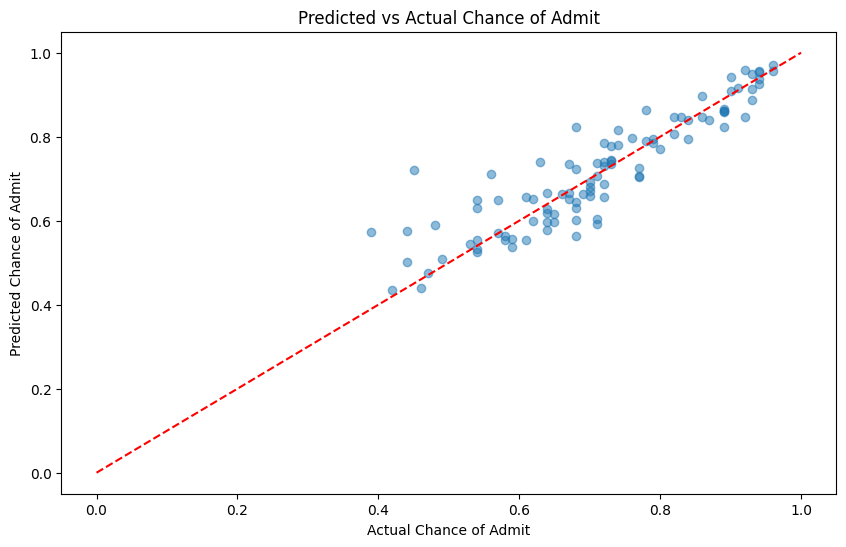

Actual: 0.93, Predicted: 0.9145747301198481
Actual: 0.84, Predicted: 0.795181269867784
Actual: 0.39, Predicted: 0.5726598571182042
Actual: 0.77, Predicted: 0.7073696828250431
Actual: 0.74, Predicted: 0.8158828235185411
Actual: 0.89, Predicted: 0.8620656119486045
Actual: 0.47, Predicted: 0.4745974582093928
Actual: 0.57, Predicted: 0.6485092345274714
Actual: 0.68, Predicted: 0.8237872842616185
Actual: 0.82, Predicted: 0.8074149753350652


In [ ]:
import matplotlib.pyplot as plt
# Plot predictions vs actual values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([0, 1], [0, 1], color='red', linestyle='--')
plt.xlabel('Actual Chance of Admit')
plt.ylabel('Predicted Chance of Admit')
plt.title('Predicted vs Actual Chance of Admit')
plt.show()
# Print some example predictions
for actual, predicted in zip(y_test[:10], y_pred[:10]):
    print(f"Actual: {actual}, Predicted: {predicted}")

In [ ]:
# Print some example predictions
for actual, predicted in zip(y_test[:10], y_pred[:10]):
    print(f'Actual: {actual:.4f}, Predicted: {predicted:.4f}')

Actual: 0.9300, Predicted: 0.9146
Actual: 0.8400, Predicted: 0.7952
Actual: 0.3900, Predicted: 0.5727
Actual: 0.7700, Predicted: 0.7074
Actual: 0.7400, Predicted: 0.8159
Actual: 0.8900, Predicted: 0.8621
Actual: 0.4700, Predicted: 0.4746
Actual: 0.5700, Predicted: 0.6485
Actual: 0.6800, Predicted: 0.8238
Actual: 0.8200, Predicted: 0.8074


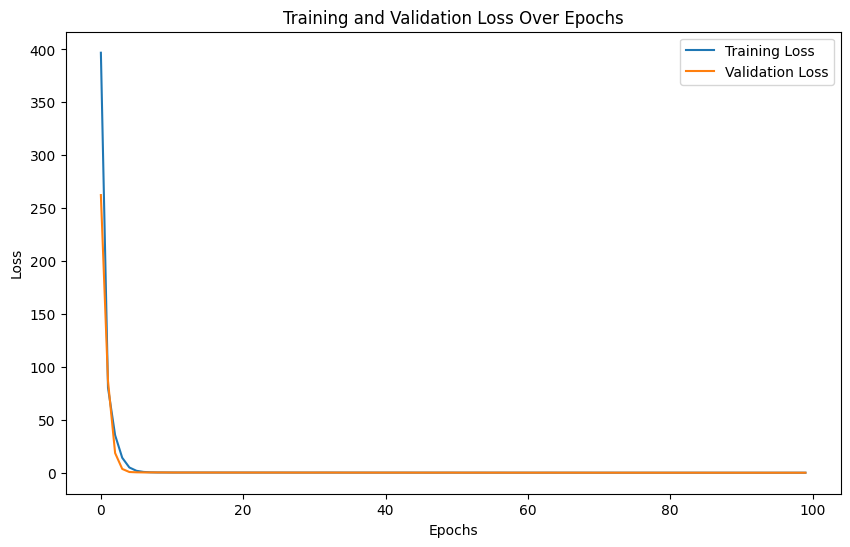

In [ ]:
# Plot the loss over epochs
plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss Over Epochs')
plt.legend()
plt.show()